<a href="https://colab.research.google.com/github/muhbagasaryad/Python/blob/main/Muhammad_Bagas_A_D__1101180139_Tubes_SKO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Muhammad Bagas Arya Darmawan 

NIM : 1101180139

Kelas : TT-42-07

In [1]:
import math as m
import matplotlib.pyplot as plt
import numpy as np

Objek perancangan FTTB :

--> Sentral - ODC - ODP - roset

- 1 Gedung = 40 Lantai

- 1 Lantai = 20 kamar

- 4 Connector dan 2 spliter

- 1 spliter dengan redaman 19.5 dB perbandungan 1:64 dari ONU ke ODP dan 1 spliter dengan redaman 16 dB perbandingan 1:32 dari ODP ke roset.

- jenis fiber G625D dengan panjang gelombang 1310 nm dengan redaman 0.35 dB/Km

- 6 Splicer dengan redaman 0.1 dB

***

***

- Jarak Sentral ke ODP = 18 Km
- Jarak ODP ke Roset = 4 x 3 = 12 meter
- Total jarak = 18 Km + 12 meter = 180012 meter atau 18.012 Km

Parameter - parameter

In [2]:
#dayaterima (Pr)

d= np.arange(1.012,18.013,1)
#print(d)
lf = 0.35 * d #dB (loss fiber)
ns = 8 #jumlah Splicer
ls = 0.1 * 6 #dB (loss Splicer dikali ns)
nc = 4 #jumlah connector
lc = 0.3 * 4 #dB (loss connector dikali nc)
l_sp = 16 + 19.5 #dB (loss Splitter 1:64 dan 1:32)
pt = 5 #dBm

#SNR

R = 0.85 #A/W (Responsifitas)
M = -0.23 #db (Tambahan daya sinyal)
lm = 3 #dB (loss margin)
q = 1.6*10**-19 #Muatan
#ip = 1 #
id = 2*10**-7 #Ampere (arus gelap)
B = 8*10**9 #Bandwith
F = 1 #noise figure
K = 1.38*10**-23 #k.boltzman
teff = 290 #kelvin
RL = 50 #

#Convert

NtL = lambda x : 10 * np.log10(x)
LtN = lambda x : 10**(x/10)

Fungsi Pr (daya terima)


In [3]:
def PR(pt,d,lf,ns,ls,nc,lc,l_sp,lm):
  RT = lf + ls + lc + l_sp + lm
  pr = pt - RT
  return pr
pr = PR(pt,d,lf,ns,ls,nc,lc,l_sp,lm)
print(pr)

[-35.6542 -36.0042 -36.3542 -36.7042 -37.0542 -37.4042 -37.7542 -38.1042
 -38.4542 -38.8042 -39.1542 -39.5042 -39.8542 -40.2042 -40.5542 -40.9042
 -41.2542 -41.6042]


Fungsi SNR

In [4]:
#Arus primer
def ap(pr):
  pr_num = LtN(pr)
  ip = pr_num * R
  return ip
ip = ap(pr)
#print(ip)

#BDC
def bdc(q,id,B,M,F):
  BDC = 2*q*id*B*M*M*F
  return BDC
BDC = bdc(q,id,B,M,F)
#print(BDC)

#SN (shot noise)
def sn(q,ip,B,M,F):
  SN = 2*q*ip*B*M*M*F
  return SN
SN = sn(q,ip,B,M,F)
#print(SN)

#NT (noise thermal)
def nt(K,teff,B,RL):
  NT = (4*K*teff*B)/RL
  return NT
NT = nt(K,teff,B,RL)
#print(NT)

#SNR (signal noise ratio)
def snr(BDC,SN,NT,M,ip):
  SNR = ((ip)**2 * M**2)/(BDC + SN + NT)
  SNR1 = NtL(SNR) #dalam dB 
  return SNR1
SNR1 = snr(BDC,SN,NT,M,ip)
print(SNR1) #dB

[30.37715006 29.68121304 28.9849648  28.28842895 27.59162733 26.89458015
 26.19730612 25.49982253 24.80214541 24.10428952 23.40626856 22.70809517
 22.00978102 21.31133693 20.61277285 19.91409802 19.21532094 18.51644947]


Fungsi Q-Faktor

In [5]:
#Q-Faktor
def qf(SNR1):
  qf = 10**(SNR1/20)
  return qf
QF = qf(SNR1)
print(QF)

[33.02611608 30.48320678 28.13508556 25.96698025 23.96521703 22.11714205
 20.41104808 18.83610604 17.38230117 16.04037348 14.80176238 13.65855508
 12.60343863 11.6296554  10.73096164  9.90158912  9.13620944  8.42990098]


Fungsi BER 

In [6]:
def ber(QF):
  phi = 3.14159
  BER = (1/(QF*np.sqrt(2*phi)))*(np.exp(-QF**2/2))
  return BER
BER = ber(QF)
print(BER)

[1.71502701e-239 2.17776090e-204 1.82637092e-174 5.85551205e-149
 3.21218559e-127 1.08319246e-108 6.68560900e-093 1.91566199e-079
 5.63613625e-068 3.35046016e-058 7.16698787e-050 9.02313089e-043
 1.01696516e-036 1.46697003e-031 3.67281102e-027 2.06905128e-023
 3.27185374e-020 1.75349008e-017]


Grafik SNR

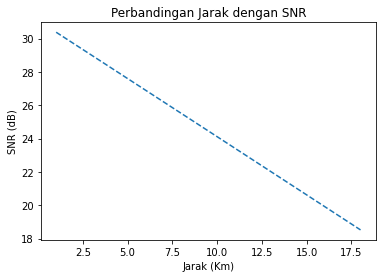

In [7]:
def g_snr():
  plt.figure()
  plt.plot(d,SNR1,'--')
  plt.title('Perbandingan Jarak dengan SNR')
  plt.xlabel('Jarak (Km)')
  plt.ylabel('SNR (dB)')
  plt.show()

g_snr()

dari gambar diatas dapat di simpulkan bahwa jika jarak semakin besar makan SNR semakin kecil, maka dari itu semakin jauh jarak, SNR semakin kurang bagus

Grafik Q-Faktor

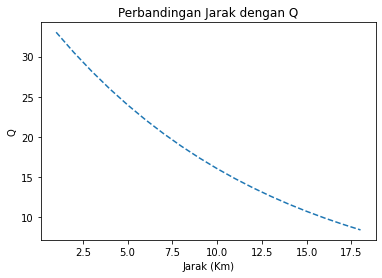

In [8]:
def g_Q():
  plt.figure()
  plt.plot(d,QF,'--')
  plt.title('Perbandingan Jarak dengan Q')
  plt.xlabel('Jarak (Km)')
  plt.ylabel('Q')
  plt.show()

g_Q()

dilihat dari gambar diatas dapat disimpulkan bahwa perbandingan jarak dengan Q, dimana jika jarak semakin jauh maka Q semakin kecil.

Grafik BER

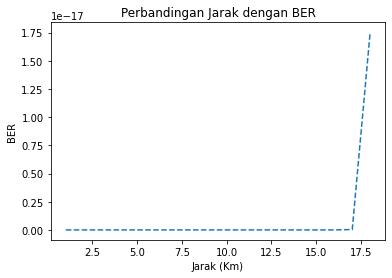

In [9]:
def g_BER():
  plt.figure()
  plt.plot(d,BER,'--')
  plt.title('Perbandingan Jarak dengan BER')
  plt.xlabel('Jarak (Km)')
  plt.ylabel('BER')
  plt.show()

g_BER()

dilihat dari gambar diatas dapat disimpulkan bahwa jarak yang dilalui dari 0 hingga kurang dari 17.5 BER konstan, lalu ketika jarak melebihi itu BER langsung melonjak naik, maka semakin jelek BER nya jika jarak sudah melebihi jarak >= +/-17.5

Grafik perbandingan BER dengan SNR

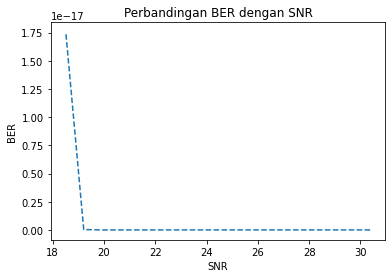

In [10]:
def g_SNRB():
  plt.figure()
  plt.plot(SNR1,BER,'--')
  plt.title('Perbandingan BER dengan SNR')
  plt.xlabel('SNR')
  plt.ylabel('BER')
  plt.show()

g_SNRB()

Dilihat dari gambar disamping dapat disimpulkan bahwa perbandingan SNR dengan BER , jika BER nya semakin banyak maka SNR semakin menurun atau kurang bagus. karena jika terlalu banyak noise maka error pun semakin banyak.